### Cajamar Datathon  <br>
#### Universidad de Navarra <br>
#### Equipo Sarobe <br>
#### Diego de Lemos, Diego Garcia y Pedro Sarobe

Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

Importamos los datasets correspondientes a la investigacion. El llamado test es la produccion del 2022 que vamos que predecir

In [2]:
TRAIN = pd.read_csv('TRAIN.csv', delimiter = ',')
TEST = pd.read_csv('TEST.csv', delimiter = ',')
ETO = pd.read_csv('ETO.csv', delimiter = ';')
METEO = pd.read_csv('Meteo CSV2.csv', delimiter = ',')

C:\Users\diede\AppData\Local\Temp\ipykernel_3924\1395896691.py:3: DtypeWarning: Columns (106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  ETO = pd.read_csv('ETO.csv', delimiter = ';')


## Limpieza, estructura y organizacion de datos

### TRAIN <br>
Ya tiene excluido los datos del 2022 porque los vamos a predecir en test.

In [3]:
TRAIN

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,49636,473,10,450-480,59,2,0,1,0,127190.000
1,14,84804,804,12,480-520,32,2,0,1,0,113270.000
2,14,95678,144,15,600-640,17,1,0,1,0,110370.000
3,14,86582,464,14,650-660,17,1,0,1,0,90640.000
4,14,83472,464,14,650-660,59,1,0,1,0,80920.000
...,...,...,...,...,...,...,...,...,...,...,...
8521,21,62521,732,7,550-630,59,2,0,1,0,53.966
8522,21,62521,732,7,550-630,59,1,0,1,0,37.994
8523,21,32986,441,12,455-470,17,1,0,1,0,36.743
8524,21,27166,885,3,500-700,59,1,0,1,0,0.850


In [4]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CAMPAÑA      8526 non-null   int64  
 1   ID_FINCA     8526 non-null   int64  
 2   ID_ZONA      8526 non-null   int64  
 3   ID_ESTACION  8526 non-null   int64  
 4   ALTITUD      8477 non-null   object 
 5   VARIEDAD     8526 non-null   int64  
 6   MODO         8526 non-null   int64  
 7   TIPO         8526 non-null   int64  
 8   COLOR        8526 non-null   int64  
 9   SUPERFICIE   8526 non-null   int64  
 10  PRODUCCION   8526 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 732.8+ KB


In [5]:
TRAIN[['ALTITUD', '2']] = TRAIN['ALTITUD'].str.split('-', expand=True)
TRAIN = TRAIN.drop('2', axis=1)
TRAIN

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,14,49636,473,10,450,59,2,0,1,0,127190.000
1,14,84804,804,12,480,32,2,0,1,0,113270.000
2,14,95678,144,15,600,17,1,0,1,0,110370.000
3,14,86582,464,14,650,17,1,0,1,0,90640.000
4,14,83472,464,14,650,59,1,0,1,0,80920.000
...,...,...,...,...,...,...,...,...,...,...,...
8521,21,62521,732,7,550,59,2,0,1,0,53.966
8522,21,62521,732,7,550,59,1,0,1,0,37.994
8523,21,32986,441,12,455,17,1,0,1,0,36.743
8524,21,27166,885,3,500,59,1,0,1,0,0.850


Asignar el tipo de datos a cada columna

In [6]:
TRAIN = TRAIN.astype({'CAMPAÑA':'string','ID_FINCA':'string','ID_ZONA':'string','ID_ESTACION':'string', 'VARIEDAD':'string','COLOR':'string', "ALTITUD":'float64'})
TRAIN.dtypes

CAMPAÑA         string
ID_FINCA        string
ID_ZONA         string
ID_ESTACION     string
ALTITUD        float64
VARIEDAD        string
MODO             int64
TIPO             int64
COLOR           string
SUPERFICIE       int64
PRODUCCION     float64
dtype: object

In [7]:
TRAIN['SUPERFICIE'].replace(0, np.nan, inplace=True)
TRAIN['SUPERFICIE'].value_counts()

1.0     702
2.0     373
3.0     188
4.0     130
5.0      77
6.0      38
7.0      34
8.0      28
10.0     17
9.0      12
12.0      6
11.0      6
13.0      4
14.0      4
21.0      4
16.0      2
17.0      2
25.0      2
27.0      1
22.0      1
Name: SUPERFICIE, dtype: int64

In [8]:
na_countsTRAIN = TRAIN.isna().sum()
print(na_countsTRAIN)

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD          49
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE     6895
PRODUCCION        0
dtype: int64


<AxesSubplot: >

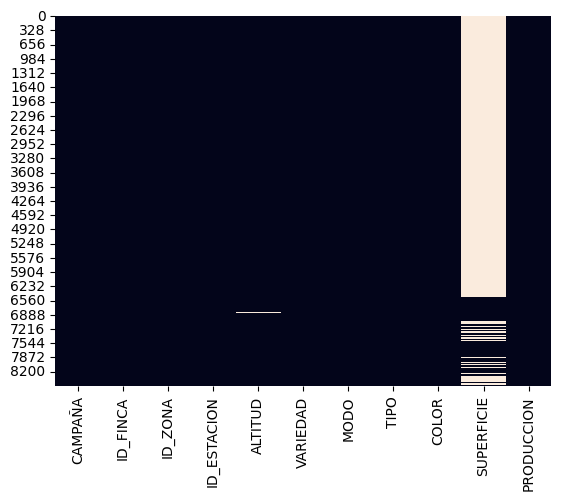

In [9]:
sns.heatmap(TRAIN.isnull(), cbar=False)

Rellene los valores de Superficie que faltan con un modelo predictivo utilizando datos de 2020 y 2021

In [10]:
TRAIN20 = TRAIN
TRAIN20 = TRAIN20[ (TRAIN20['CAMPAÑA'] == '20')]

TRAIN21 = TRAIN
TRAIN21 = TRAIN21[ (TRAIN21['CAMPAÑA'] == '21')]

TRAIN2021 = [TRAIN20, TRAIN21]
TRAINED = pd.concat(TRAIN2021)

TRAINED.dropna(subset=['SUPERFICIE'], inplace=True)

In [11]:
target = 'SUPERFICIE'
X = TRAINED.drop(target, axis = 1)
y = TRAINED[target]

In [12]:
from sklearn.model_selection import train_test_split as tts
Xtr, Xte, ytr, yte = tts(X, y, test_size=0.25, random_state=123)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as select

num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first'))])

ct = ColumnTransformer(transformers=[
    ('num', num_trans, select(dtype_exclude="object")),
    ('cat', cat_trans, select(dtype_include="object"))
])

from sklearn.ensemble import RandomForestRegressor

rf = Pipeline(steps=[('p', ct),
                     ('RF', RandomForestRegressor())])

In [14]:
grid = {
'RF__n_estimators' : [150, 200, 250],
'RF__max_depth'    : [6, 7, 8],
'RF__max_features' : ["sqrt", "log2"]
}

In [15]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(rf, grid, cv = 5, scoring = 'r2')
gs.fit(Xtr, ytr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('p',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000206087C7310>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000206087CB5E0>)])),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__max_depth': [6, 7, 8],
                         'RF__max_features': ['sqrt', 'log2'],
                         'RF__n_estimators': [150, 200, 250]},
             scoring='r2')

In [16]:
gs.best_score_
gs.best_estimator_
gs.best_params_

{'RF__max_depth': 8, 'RF__max_features': 'log2', 'RF__n_estimators': 150}

In [17]:
SUPERTEST = TRAIN[TRAIN['SUPERFICIE'].isna()]

In [18]:
SUPERTEST2 = pd.DataFrame(gs.predict(SUPERTEST))
SUPERTEST['SUPERFICIE'].fillna(SUPERTEST2[0], inplace=True)

frames = [TRAINED, SUPERTEST]
TRAIN = pd.concat(frames)

C:\Users\diede\AppData\Local\Temp\ipykernel_3924\2703293460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUPERTEST['SUPERFICIE'].fillna(SUPERTEST2[0], inplace=True)


Imputamos los datos restantes con la media

In [19]:
TRAIN['SUPERFICIE'].fillna(TRAIN['SUPERFICIE'].mean(), inplace=True)

In [20]:
TRAIN.describe()

,ALTITUD,MODO,TIPO,SUPERFICIE,PRODUCCION
count,8477.000000,8526.000000,8526.000000,8526.000000,8526.000000
mean,562.963902,1.490500,0.011963,2.465293,9209.190958
std,75.808647,0.499939,0.108728,2.040093,13268.812623
min,370.000000,1.000000,0.000000,1.000000,0.718000
25%,480.000000,1.000000,0.000000,1.385364,1940.000000
50%,590.000000,1.000000,0.000000,1.896522,4620.000000
75%,620.000000,2.000000,0.000000,2.595829,11137.500000
max,820.000000,2.000000,1.000000,27.000000,177520.000000


In [21]:
TRAIN.corr()

C:\Users\diede\AppData\Local\Temp\ipykernel_3924\3978199787.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  TRAIN.corr()


,ALTITUD,MODO,TIPO,SUPERFICIE,PRODUCCION
ALTITUD,1.000000,0.088683,0.060056,0.212282,0.163365
MODO,0.088683,1.000000,0.071147,0.182636,0.271032
TIPO,0.060056,0.071147,1.000000,0.132869,0.032216
SUPERFICIE,0.212282,0.182636,0.132869,1.000000,0.833287
PRODUCCION,0.163365,0.271032,0.032216,0.833287,1.000000


In [22]:
TRAIN.duplicated().sum()

0

### TEST

In [25]:
TEST[['ALTITUD', '2']] = TEST['ALTITUD'].str.split('-', expand=True)
TEST = TEST.drop('2', axis=1)
TEST

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PRODUCCION
0,22,48626,302,13,600,32,2,0,1,4,NaN
1,22,47921,302,13,600,32,2,0,1,7,NaN
2,22,5696,919,14,650,59,1,0,1,8,NaN
3,22,98814,919,14,650,32,2,0,1,3,NaN
4,22,98814,919,14,650,40,2,0,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1070,22,37461,239,6,700,52,2,0,1,4,NaN
1071,22,58769,239,6,700,32,2,0,1,4,NaN
1072,22,58769,239,6,700,59,2,0,1,4,NaN
1073,22,88928,239,6,700,40,2,0,1,5,NaN


In [26]:
TEST = TEST.astype({'CAMPAÑA':'string','ID_FINCA':'string','ID_ZONA':'string','ID_ESTACION':'string', 'VARIEDAD':'string','COLOR':'string', "ALTITUD":'float64'})
TEST.dtypes

CAMPAÑA         string
ID_FINCA        string
ID_ZONA         string
ID_ESTACION     string
ALTITUD        float64
VARIEDAD        string
MODO             int64
TIPO             int64
COLOR           string
SUPERFICIE       int64
PRODUCCION     float64
dtype: object

In [27]:
TEST['SUPERFICIE'].replace(0, np.nan, inplace=True)

TEST['SUPERFICIE'].fillna(TEST['SUPERFICIE'].mean(), inplace=True)

<AxesSubplot: >

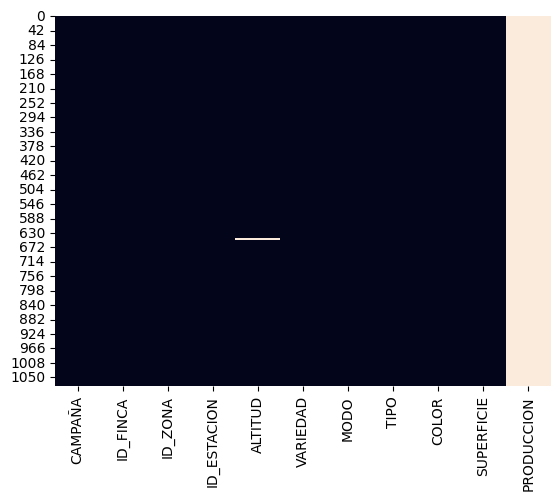

In [28]:
sns.heatmap(TEST.isnull(), cbar=False)

In [29]:
TEST.describe()

,ALTITUD,MODO,TIPO,SUPERFICIE,PRODUCCION
count,1070.000000,1075.000000,1075.000000,1075.000000,0.0
mean,566.084112,1.659535,0.014884,2.679669,NaN
std,75.666310,0.474086,0.121144,2.369929,NaN
min,370.000000,1.000000,0.000000,1.000000,NaN
25%,485.000000,1.000000,0.000000,1.000000,NaN
50%,600.000000,2.000000,0.000000,2.000000,NaN
75%,625.000000,2.000000,0.000000,3.000000,NaN
max,730.000000,2.000000,1.000000,22.000000,NaN


In [30]:
TEST.duplicated().sum()

0

### ETO

In [31]:
ETO

,date,DewpointLocalAfternoonAvg,DewpointLocalAfternoonMax,DewpointLocalAfternoonMin,DewpointLocalDayAvg,DewpointLocalDayMax,DewpointLocalDayMin,DewpointLocalDaytimeAvg,DewpointLocalDaytimeMax,DewpointLocalDaytimeMin,...,WindSpeedLocalMorningAvg,WindSpeedLocalMorningMax,WindSpeedLocalMorningMin,WindSpeedLocalNighttimeAvg,WindSpeedLocalNighttimeMax,WindSpeedLocalNighttimeMin,WindSpeedLocalOvernightAvg,WindSpeedLocalOvernightMax,WindSpeedLocalOvernightMin,ID_ESTACION
0,20150629,285.9,285.9,285.9,286.0,287.0,285.4,285.9,285.9,285.9,...,NaN,NaN,NaN,2.6,5.0,1.1,1.7,2.1,1.1,13
1,20150630,283.0,283.6,282.5,284.3,286.5,282.5,283.2,283.9,282.5,...,2.2,3.8,1.4,2.7,5.2,1.4,1.5,1.9,1.4,13
2,20150701,286.1,286.5,285.5,285.8,288.0,283.8,285.4,286.5,283.8,...,2.7,4.3,1.2,3.0,5.7,1.4,1.9,2.8,1.4,13
3,20150702,288.9,289.4,287.9,288.3,291.8,286.1,287.7,289.4,286.1,...,1.7,2.3,1.2,3.6,5.4,2.4,2.7,3.4,2.4,13
4,20150703,289.1,290.4,288.5,290.5,293.0,287.8,290.6,293.0,288.5,...,3.5,5.0,2.3,3.1,6.0,1.5,1.9,2.2,1.5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51175,20220626,284.0,285.0,283.0,285.0,288.0,283.0,285.0,286.0,283.0,...,2.1,2.6,1.2,2.1,5.2,0.6,1.1,1.6,0.6,8
51176,20220627,289.0,289.0,288.0,288.0,290.0,286.0,289.0,290.0,288.0,...,3.2,3.9,2.2,3.1,5.0,1.4,1.8,2.8,1.4,8
51177,20220628,283.0,285.0,282.0,286.0,290.0,282.0,284.0,287.0,282.0,...,1.8,2.5,1.2,2.4,5.0,1.0,1.3,1.7,1.0,8
51178,20220629,283.0,285.0,282.0,285.0,288.0,282.0,284.0,286.0,282.0,...,2.2,3.1,1.3,2.7,5.4,1.3,1.6,1.9,1.3,8


In [32]:
ETO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51180 entries, 0 to 51179
Columns: 275 entries, date to ID_ESTACION
dtypes: float64(226), int64(28), object(21)
memory usage: 107.4+ MB


Asignar el tipo de datos a cada columna <br>
*la variable de date lo transformamos en string para luego poder separarlas y agruparlas por año*

In [33]:
ETO = ETO.astype({'date':'string'})
ETO = ETO.astype({'ID_ESTACION':'string'})
ETO.dtypes

date                           string
DewpointLocalAfternoonAvg     float64
DewpointLocalAfternoonMax     float64
DewpointLocalAfternoonMin     float64
DewpointLocalDayAvg           float64
                               ...   
WindSpeedLocalNighttimeMin    float64
WindSpeedLocalOvernightAvg    float64
WindSpeedLocalOvernightMax    float64
WindSpeedLocalOvernightMin    float64
ID_ESTACION                    string
Length: 275, dtype: object

In [34]:
ETO.describe()

,DewpointLocalAfternoonAvg,DewpointLocalAfternoonMax,DewpointLocalAfternoonMin,DewpointLocalDayAvg,DewpointLocalDayMax,DewpointLocalDayMin,DewpointLocalDaytimeAvg,DewpointLocalDaytimeMax,DewpointLocalDaytimeMin,DewpointLocalEveningAvg,...,WindSpeedLocalEveningMin,WindSpeedLocalMorningAvg,WindSpeedLocalMorningMax,WindSpeedLocalMorningMin,WindSpeedLocalNighttimeAvg,WindSpeedLocalNighttimeMax,WindSpeedLocalNighttimeMin,WindSpeedLocalOvernightAvg,WindSpeedLocalOvernightMax,WindSpeedLocalOvernightMin
count,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,...,51180.000000,51160.000000,51160.000000,51160.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000,51180.000000
mean,280.817790,281.829791,279.949850,281.334281,283.782683,278.840741,281.007812,282.710051,279.182282,281.944472,...,2.006735,2.724156,3.659683,1.916568,2.510084,3.916938,1.587659,2.213939,2.672382,1.765930
std,5.740212,5.644393,5.862113,5.779998,5.698248,6.048484,5.712349,5.597571,5.976297,6.034704,...,1.384064,1.814302,2.112686,1.585190,1.467940,1.748038,1.287805,1.611146,1.790667,1.456031
min,259.000000,261.000000,256.000000,261.000000,264.000000,256.000000,259.000000,262.000000,256.000000,258.000000,...,0.000000,0.100000,0.400000,0.000000,0.200000,0.400000,0.000000,0.000000,0.100000,0.000000
25%,277.000000,278.000000,276.000000,277.000000,280.000000,274.700000,277.000000,279.000000,275.000000,277.900000,...,1.100000,1.500000,2.100000,0.900000,1.600000,2.700000,0.800000,1.200000,1.500000,0.800000
50%,281.000000,282.000000,280.000000,281.200000,283.700000,279.000000,281.000000,282.800000,279.200000,282.000000,...,1.700000,2.100000,3.100000,1.400000,2.100000,3.700000,1.200000,1.700000,2.100000,1.300000
75%,285.000000,286.000000,284.000000,286.000000,288.300000,283.300000,285.200000,287.000000,283.700000,287.000000,...,2.500000,3.500000,4.600000,2.500000,2.900000,4.700000,2.000000,2.700000,3.200000,2.200000
max,294.800000,295.400000,294.300000,295.000000,296.400000,294.000000,295.000000,295.800000,294.200000,295.400000,...,12.700000,13.500000,15.400000,12.900000,15.100000,16.300000,12.700000,15.300000,16.300000,13.800000


In [35]:
ETO.shape

(51180, 275)

In [36]:
ETO.value_counts()

date      DewpointLocalAfternoonAvg  DewpointLocalAfternoonMax  DewpointLocalAfternoonMin  DewpointLocalDayAvg  DewpointLocalDayMax  DewpointLocalDayMin  DewpointLocalDaytimeAvg  DewpointLocalDaytimeMax  DewpointLocalDaytimeMin  DewpointLocalEveningAvg  DewpointLocalEveningMax  DewpointLocalEveningMin  DewpointLocalMorningAvg  DewpointLocalMorningMax  DewpointLocalMorningMin  DewpointLocalNighttimeAvg  DewpointLocalNighttimeMax  DewpointLocalNighttimeMin  DewpointLocalOvernightAvg  DewpointLocalOvernightMax  DewpointLocalOvernightMin  EvapotranspirationLocalAfternoonAvg  EvapotranspirationLocalAfternoonMax  EvapotranspirationLocalAfternoonMin  EvapotranspirationLocalDayAvg  EvapotranspirationLocalDayMax  EvapotranspirationLocalDayMin  EvapotranspirationLocalDaytimeAvg  EvapotranspirationLocalDaytimeMax  EvapotranspirationLocalDaytimeMin  EvapotranspirationLocalEveningAvg  EvapotranspirationLocalEveningMax  EvapotranspirationLocalEveningMin  EvapotranspirationLocalMorningAvg  Evapotrans

<AxesSubplot: >

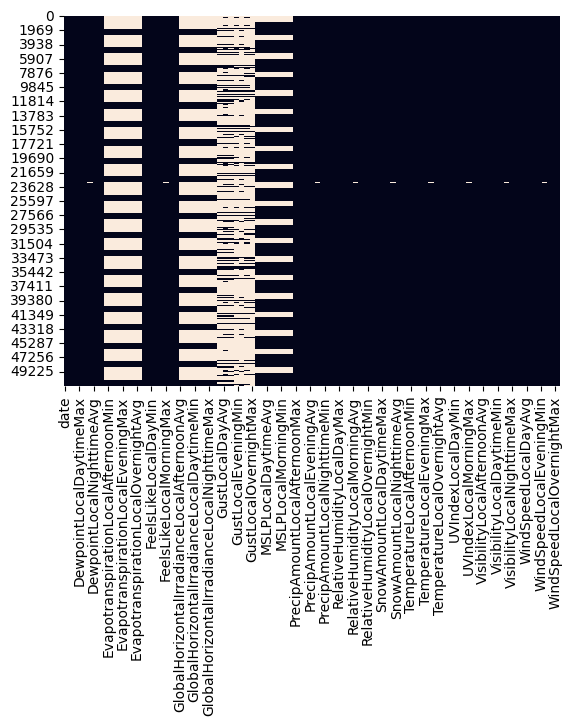

In [37]:
sns.heatmap(ETO.isnull(), cbar=False)

In [38]:
ETO.duplicated().sum()

0

Crear un conjunto de datos de subconjunto con variables cada vez más significativas <br>
*No tomamos en cuenta para el modelo las variables que contienen muchos Na's, no aportan informacion*

In [39]:
ETO.dtypes

date                           string
DewpointLocalAfternoonAvg     float64
DewpointLocalAfternoonMax     float64
DewpointLocalAfternoonMin     float64
DewpointLocalDayAvg           float64
                               ...   
WindSpeedLocalNighttimeMin    float64
WindSpeedLocalOvernightAvg    float64
WindSpeedLocalOvernightMax    float64
WindSpeedLocalOvernightMin    float64
ID_ESTACION                    string
Length: 275, dtype: object

In [40]:
ETO2 = ETO[['date','ID_ESTACION','DewpointLocalDayAvg','FeelsLikeLocalDayAvg','PrecipAmountLocalDayAvg','RelativeHumidityLocalDayAvg','SnowAmountLocalDayAvg','TemperatureLocalDayAvg','UVIndexLocalDayAvg','VisibilityLocalDayAvg','WindSpeedLocalDayAvg']].copy()
ETO2

,date,ID_ESTACION,DewpointLocalDayAvg,FeelsLikeLocalDayAvg,PrecipAmountLocalDayAvg,RelativeHumidityLocalDayAvg,SnowAmountLocalDayAvg,TemperatureLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg
0,20150629,13,286.0,304.1,0.0,34.3,0.0,304.1,0.5,16093.0,4.0
1,20150630,13,284.3,299.2,0.0,43.6,0.0,299.2,2.5,16093.0,3.3
2,20150701,13,285.8,298.3,0.0,48.1,0.0,298.3,2.7,16093.0,3.6
3,20150702,13,288.3,297.6,0.0,58.5,0.0,297.2,2.3,16093.0,3.0
4,20150703,13,290.5,298.2,0.0,67.5,0.0,297.8,2.6,16093.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...
51175,20220626,8,285.0,296.0,0.0,55.3,0.0,296.0,2.5,13359.0,2.5
51176,20220627,8,288.0,294.0,0.0,72.8,0.0,294.0,2.4,12205.0,3.0
51177,20220628,8,286.0,295.0,0.0,62.4,0.0,295.0,2.5,11275.0,2.7
51178,20220629,8,285.0,297.0,0.0,53.1,0.0,297.0,2.5,13425.0,3.0


<AxesSubplot: >

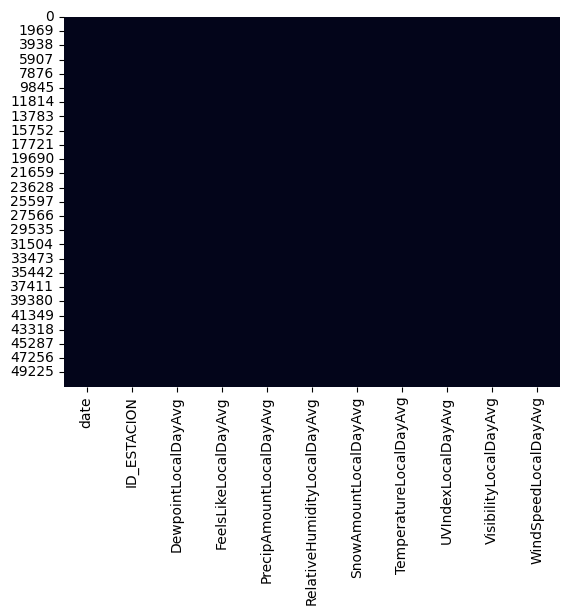

In [41]:
sns.heatmap(ETO2.isnull(), cbar=False)

In [42]:
ETO2['date'] = ETO2['date'].str[2:4]
ETO2 = ETO2.rename(columns={'date': 'CAMPAÑA'})

print(ETO2)

      CAMPAÑA ID_ESTACION  DewpointLocalDayAvg  FeelsLikeLocalDayAvg  \
0          15          13                286.0                 304.1   
1          15          13                284.3                 299.2   
2          15          13                285.8                 298.3   
3          15          13                288.3                 297.6   
4          15          13                290.5                 298.2   
...       ...         ...                  ...                   ...   
51175      22           8                285.0                 296.0   
51176      22           8                288.0                 294.0   
51177      22           8                286.0                 295.0   
51178      22           8                285.0                 297.0   
51179      22           8                285.0                 297.0   

       PrecipAmountLocalDayAvg  RelativeHumidityLocalDayAvg  \
0                          0.0                         34.3   
1        

In [43]:
df2 = ETO2.groupby(['ID_ESTACION','CAMPAÑA'], as_index=False).mean()
df2

,ID_ESTACION,CAMPAÑA,DewpointLocalDayAvg,FeelsLikeLocalDayAvg,PrecipAmountLocalDayAvg,RelativeHumidityLocalDayAvg,SnowAmountLocalDayAvg,TemperatureLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg
0,0,15,286.118280,291.602151,0.106989,74.627419,0.000000,291.586022,1.284946,15850.397849,2.361828
1,0,16,282.751366,288.915301,0.109016,68.730328,0.000000,289.407104,1.308470,14791.002732,2.850000
2,0,17,281.860274,288.723288,0.066027,65.409041,0.000014,289.169863,1.374521,12949.090411,2.421918
3,0,18,281.654795,288.169863,0.093973,65.996712,0.000005,288.767123,1.344110,12807.956164,2.625479
4,0,19,280.841096,288.605479,0.060000,62.097260,0.000000,289.063014,1.366301,12527.895890,2.490411
...,...,...,...,...,...,...,...,...,...,...,...
155,9,18,281.528493,287.803836,0.085205,66.921644,0.000003,288.523562,1.347397,12689.699178,2.918082
156,9,19,280.789315,288.230959,0.050137,63.386027,0.000000,288.829863,1.364658,12392.233425,2.839726
157,9,20,281.998634,288.832787,0.041257,66.506831,0.000008,289.283333,1.362842,12133.681148,2.534426
158,9,21,281.961096,288.511781,0.035890,66.889863,0.000005,289.096164,1.349589,11554.746027,2.767945


### METEO

In [44]:
METEO

,validTimeUtc,precip7Day,precipMtd,precipYtd,pressureChange,pressureMeanSeaLevel,relativeHumidity,snow24Hour,snow7Day,snowMtd,...,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION
0,29/6/2015 16:20,NaN,NaN,NaN,-1.4,NaN,27.0,0.0,NaN,NaN,...,36.3,17.9,12.8,34.5,2.0,16.09,NaN,NaN,18.7,13
1,29/6/2015 17:20,NaN,NaN,NaN,-1.0,NaN,26.3,0.0,NaN,NaN,...,35.0,17.9,12.3,34.3,1.0,16.09,NaN,NaN,18.0,13
2,29/6/2015 18:20,NaN,NaN,NaN,-0.3,NaN,29.0,0.0,NaN,NaN,...,34.7,17.9,12.4,32.8,0.0,16.09,NaN,NaN,16.6,13
3,29/6/2015 19:20,NaN,NaN,NaN,0.3,NaN,33.2,0.0,NaN,NaN,...,34.7,17.9,12.9,31.0,0.0,16.09,NaN,NaN,15.1,13
4,29/6/2015 20:20,NaN,NaN,NaN,0.9,NaN,43.1,0.0,NaN,NaN,...,34.7,17.9,13.9,28.0,0.0,16.09,NaN,NaN,10.1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520546,21/6/2016 2:20,NaN,NaN,NaN,-0.3,NaN,81.0,0.0,NaN,NaN,...,27.8,11.8,10.7,13.9,0.0,16.09,NaN,NaN,4.3,1
520547,21/6/2016 3:20,NaN,NaN,NaN,-0.1,NaN,83.3,0.0,NaN,NaN,...,27.8,11.8,10.6,13.3,0.0,16.09,NaN,NaN,4.3,1
520548,21/6/2016 4:20,NaN,NaN,NaN,-0.4,NaN,82.9,0.0,NaN,NaN,...,27.8,11.9,10.0,12.8,0.0,16.09,NaN,NaN,4.3,1
520549,21/6/2016 5:20,NaN,NaN,NaN,0.2,NaN,87.9,0.0,NaN,NaN,...,27.8,12.0,10.5,12.3,0.0,16.09,NaN,NaN,6.1,1


In [45]:
METEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520551 entries, 0 to 520550
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   validTimeUtc             520551 non-null  object 
 1   precip7Day               337841 non-null  float64
 2   precipMtd                337841 non-null  float64
 3   precipYtd                337841 non-null  float64
 4   pressureChange           520533 non-null  float64
 5   pressureMeanSeaLevel     369223 non-null  float64
 6   relativeHumidity         520551 non-null  float64
 7   snow24Hour               520533 non-null  float64
 8   snow7Day                 337841 non-null  float64
 9   snowMtd                  337841 non-null  float64
 10  snowSeason               337841 non-null  float64
 11  snowYtd                  337841 non-null  float64
 12  temperature              520533 non-null  float64
 13  temperatureChange24Hour  520415 non-null  float64
 14  temp

Asignar el tipo de datos a cada columna <br>
*la variable de validTimeUtc la transformamos en string para poder separarlas y agruparlas por años*

In [46]:
METEO = METEO.astype({'ID_ESTACION':'string','validTimeUtc':'string'})
METEO.dtypes

validTimeUtc                string
precip7Day                 float64
precipMtd                  float64
precipYtd                  float64
pressureChange             float64
pressureMeanSeaLevel       float64
relativeHumidity           float64
snow24Hour                 float64
snow7Day                   float64
snowMtd                    float64
snowSeason                 float64
snowYtd                    float64
temperature                float64
temperatureChange24Hour    float64
temperatureMax24Hour       float64
temperatureMin24Hour       float64
temperatureDewPoint        float64
temperatureFeelsLike       float64
uvIndex                    float64
visibility                 float64
windDirection              float64
windGust                   float64
windSpeed                  float64
ID_ESTACION                 string
dtype: object

In [47]:
METEO.value_counts()

validTimeUtc     precip7Day  precipMtd  precipYtd  pressureChange  pressureMeanSeaLevel  relativeHumidity  snow24Hour  snow7Day  snowMtd  snowSeason  snowYtd  temperature  temperatureChange24Hour  temperatureMax24Hour  temperatureMin24Hour  temperatureDewPoint  temperatureFeelsLike  uvIndex  visibility  windDirection  windGust  windSpeed  ID_ESTACION
1/1/2021 0:20    0.0         3.0        437.0      -2.0            1009.8                70.4              0.0         0.0       0.0      0.0         11.7     5.2           1.3                     10.4                  0.7                    0.3                 1.9                   0.0      13.89       250.0          27.0      15.8       13             1
29/1/2020 15:20  1.1         92.0       92.0       -1.7            1022.2                63.1              0.0         0.0       25.7     25.7        25.7     13.3          0.4                     13.8                  9.4                    6.4                 11.6                  1.0  

<AxesSubplot: >

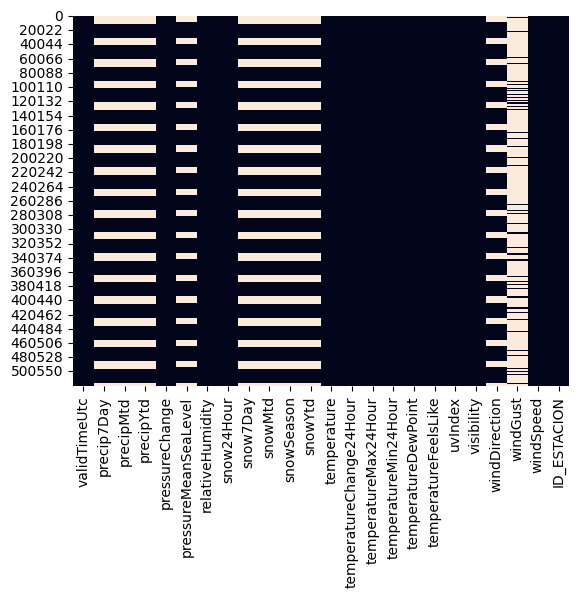

In [48]:
sns.heatmap(METEO.isnull(), cbar=False)

Eliminamos las variables menos significativas y con falta de informacion debido a que no proporciona mucho para el model

In [49]:
METEO = METEO.drop(['precip7Day', 'pressureChange', 'temperatureDewPoint','visibility','windDirection','windGust'], axis=1)

<AxesSubplot: >

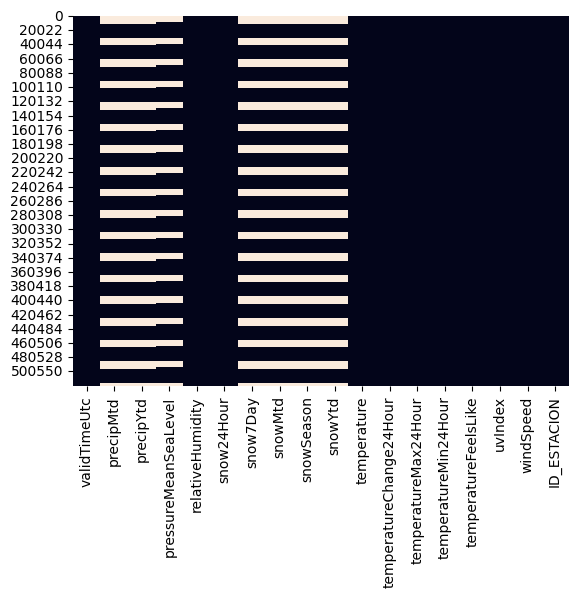

In [50]:
sns.heatmap(METEO.isnull(), cbar=False)

In [51]:
METEO[['Fecha', 'Mes', 'Año']] = METEO.validTimeUtc.str.split("/", expand = True)
METEO[['Year','Hora']] = METEO.Año.str.split(" ", expand = True)
METEO = METEO.drop(['validTimeUtc', 'Año'], axis=1)

In [52]:
METEO.describe()

,precipMtd,precipYtd,pressureMeanSeaLevel,relativeHumidity,snow24Hour,snow7Day,snowMtd,snowSeason,snowYtd,temperature,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureFeelsLike,uvIndex,windSpeed
count,337841.000000,337841.000000,369223.000000,520551.000000,520533.000000,337841.000000,337841.000000,337841.00000,337841.000000,520533.000000,520415.000000,520551.000000,520551.000000,520533.000000,520533.000000,520551.000000
mean,20.062704,133.868296,1017.924992,65.745978,0.026914,0.140236,0.300873,3.66153,3.665376,13.222502,0.007148,19.309886,7.841658,12.265174,1.367746,11.207825
std,28.657662,113.819673,7.054515,21.672462,0.540551,1.367394,1.911741,5.87981,5.883323,7.209996,1.561968,6.952688,5.163755,7.970675,2.322655,7.289302
min,0.000000,0.000000,988.600000,6.500000,0.000000,0.000000,0.000000,0.00000,0.000000,-7.900000,-10.400000,0.100000,-7.900000,-11.300000,0.000000,0.000000
25%,0.000000,13.000000,1013.400000,48.600000,0.000000,0.000000,0.000000,0.00000,0.000000,8.100000,-0.800000,13.900000,4.000000,6.500000,0.000000,5.800000
50%,7.000000,123.000000,1017.700000,67.000000,0.000000,0.000000,0.000000,0.80000,0.800000,12.200000,0.100000,18.600000,7.800000,11.300000,0.000000,9.400000
75%,32.000000,224.000000,1022.800000,84.000000,0.000000,0.000000,0.000000,5.10000,5.100000,17.800000,0.900000,24.300000,11.500000,17.600000,2.000000,15.100000
max,207.000000,965.000000,1036.300000,100.000000,25.800000,25.800000,25.700000,25.70000,25.700000,38.600000,7.600000,38.700000,23.000000,38.600000,9.000000,55.400000


In [53]:
METEO.duplicated().sum()

0

## MERGE <br>
Juntamos los datasets de TRAIN, METEO, ETO y TEST para tener un dataset con mas informacion para poder trabajar el modelo de prediccion

Unimos primero TRAIN y METEO a traves de ID_ESTACION y CAMPAÑA 

In [54]:
df = METEO.groupby(['ID_ESTACION','Year'], as_index=False).mean()
df

C:\Users\diede\AppData\Local\Temp\ipykernel_3924\2722943297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = METEO.groupby(['ID_ESTACION','Year'], as_index=False).mean()


,ID_ESTACION,Year,precipMtd,precipYtd,pressureMeanSeaLevel,relativeHumidity,snow24Hour,snow7Day,snowMtd,snowSeason,snowYtd,temperature,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureFeelsLike,uvIndex,windSpeed
0,0,2015,NaN,NaN,NaN,45.115625,0.000000,NaN,NaN,NaN,NaN,26.650000,-0.281250,35.700000,18.100000,26.684375,1.906250,10.909375
1,0,2016,NaN,NaN,NaN,65.356058,0.000000,NaN,NaN,NaN,NaN,14.231298,-0.063695,20.335353,9.009564,13.382261,1.325052,11.762906
2,0,2017,NaN,NaN,NaN,65.268380,0.060995,NaN,NaN,NaN,NaN,14.201968,0.009641,19.780116,9.253981,13.439931,1.398380,9.587477
3,0,2018,29.296787,269.144177,1014.594696,64.253944,0.027906,0.000000,0.000000,5.200000,5.200000,13.154359,-0.003990,18.350000,8.572417,12.199723,1.374539,11.028413
4,0,2019,10.916532,89.836292,1018.373784,59.942587,0.000000,0.000000,0.000000,0.000000,0.014388,13.224764,0.024066,19.368757,7.768434,12.632442,1.379064,8.785912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,9,2018,24.737349,266.197992,1014.625876,64.633256,0.010494,0.000000,0.000000,2.000000,2.000000,12.953898,-0.002260,18.711601,7.855051,11.828713,1.374077,12.342620
134,9,2019,9.554531,74.982476,1018.400761,61.103182,0.000000,0.000000,0.000000,0.000000,0.005534,12.985105,0.027250,19.899631,6.819760,12.232926,1.381370,10.010952
135,9,2020,23.520284,186.307587,1019.255627,69.863626,0.036741,0.256933,0.452785,5.991840,5.991840,14.092001,0.012973,19.943433,9.207266,13.488059,1.356177,9.312491
136,9,2021,13.274424,67.282488,1017.864124,68.195023,0.010760,0.066567,0.231336,1.636382,1.654908,13.565069,0.014332,18.890530,9.078871,12.742419,1.339171,10.586382


In [55]:
df['Year'] = df['Year'].str[2:]
df = df.rename(columns={'Year': 'CAMPAÑA'})

print(df)

    ID_ESTACION CAMPAÑA  precipMtd   precipYtd  pressureMeanSeaLevel  \
0             0      15        NaN         NaN                   NaN   
1             0      16        NaN         NaN                   NaN   
2             0      17        NaN         NaN                   NaN   
3             0      18  29.296787  269.144177           1014.594696   
4             0      19  10.916532   89.836292           1018.373784   
..          ...     ...        ...         ...                   ...   
133           9      18  24.737349  266.197992           1014.625876   
134           9      19   9.554531   74.982476           1018.400761   
135           9      20  23.520284  186.307587           1019.255627   
136           9      21  13.274424   67.282488           1017.864124   
137           9      22  21.305549  117.661064           1019.311098   

     relativeHumidity  snow24Hour  snow7Day   snowMtd  snowSeason   snowYtd  \
0           45.115625    0.000000       NaN       NaN   

In [56]:
merged_df = pd.merge(TRAIN, df, on=['CAMPAÑA','ID_ESTACION'], how='left')
merged_df

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,snowMtd,snowSeason,snowYtd,temperature,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureFeelsLike,uvIndex,windSpeed
0,20,84804,804,12,480.0,32,2,0,1,17.000000,...,0.600413,7.958263,7.958263,14.218909,0.022141,20.100642,9.233922,13.533761,1.357094,10.229613
1,20,76459,510,15,560.0,26,2,0,1,8.000000,...,1.478937,19.501536,19.501536,13.169173,0.030736,19.051318,8.073413,12.342929,1.365803,10.416777
2,20,48877,506,16,600.0,32,2,0,1,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,76459,510,15,560.0,52,2,0,1,9.000000,...,1.478937,19.501536,19.501536,13.169173,0.030736,19.051318,8.073413,12.342929,1.365803,10.416777
4,20,14843,845,16,625.0,87,2,0,0,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,21,62521,732,7,550.0,59,2,0,1,2.465293,...,0.232742,1.637788,1.669862,13.283065,0.026083,18.675046,8.646129,12.345622,1.351382,11.302396
8522,21,62521,732,7,550.0,59,1,0,1,2.465293,...,0.232742,1.637788,1.669862,13.283065,0.026083,18.675046,8.646129,12.345622,1.351382,11.302396
8523,21,32986,441,12,455.0,17,1,0,1,2.465293,...,0.230645,1.635691,1.660300,13.636313,0.006129,18.990092,9.146728,12.705484,1.342396,11.559608
8524,21,27166,885,3,500.0,59,1,0,1,2.465293,...,0.700000,4.915138,4.977074,12.898548,0.017788,18.182120,8.405138,11.822235,1.347005,11.912235


Luego agrupamos ETO con el merged de TRAIN y METEO

In [57]:
merged_final = pd.merge(merged_df, df2, on=['CAMPAÑA','ID_ESTACION'], how='left')
merged_final

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,windSpeed,DewpointLocalDayAvg,FeelsLikeLocalDayAvg,PrecipAmountLocalDayAvg,RelativeHumidityLocalDayAvg,SnowAmountLocalDayAvg,TemperatureLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg
0,20,84804,804,12,480.0,32,2,0,1,17.000000,...,10.229613,282.029508,288.895628,0.043716,66.322678,0.000008,289.415847,1.362295,12060.920765,2.785246
1,20,76459,510,15,560.0,26,2,0,1,8.000000,...,10.416777,280.869399,287.696721,0.042350,65.823497,0.000025,288.363661,1.371585,12083.457104,2.832514
2,20,48877,506,16,600.0,32,2,0,1,13.000000,...,NaN,281.273224,288.150273,0.042350,66.298634,0.000033,288.633880,1.374863,12155.423497,2.545902
3,20,76459,510,15,560.0,52,2,0,1,9.000000,...,10.416777,280.869399,287.696721,0.042350,65.823497,0.000025,288.363661,1.371585,12083.457104,2.832514
4,20,14843,845,16,625.0,87,2,0,0,6.000000,...,NaN,281.273224,288.150273,0.042350,66.298634,0.000033,288.633880,1.374863,12155.423497,2.545902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8521,21,62521,732,7,550.0,59,2,0,1,2.465293,...,11.302396,281.555616,288.138082,0.034521,66.469589,0.000005,288.822192,1.362192,11559.143288,2.959178
8522,21,62521,732,7,550.0,59,1,0,1,2.465293,...,11.302396,281.555616,288.138082,0.034521,66.469589,0.000005,288.822192,1.362192,11559.143288,2.959178
8523,21,32986,441,12,455.0,17,1,0,1,2.465293,...,11.559608,281.989863,288.524110,0.035342,66.795890,0.000005,289.193151,1.353151,11509.029041,3.022192
8524,21,27166,885,3,500.0,59,1,0,1,2.465293,...,11.912235,281.219178,287.632877,0.033973,66.660000,0.000016,288.465753,1.358630,11489.389041,3.119178


In [58]:
merged_final.describe()

,ALTITUD,MODO,TIPO,SUPERFICIE,PRODUCCION,precipMtd,precipYtd,pressureMeanSeaLevel,relativeHumidity,snow24Hour,...,windSpeed,DewpointLocalDayAvg,FeelsLikeLocalDayAvg,PrecipAmountLocalDayAvg,RelativeHumidityLocalDayAvg,SnowAmountLocalDayAvg,TemperatureLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg
count,8477.000000,8526.000000,8526.000000,8526.000000,8526.000000,3606.000000,3606.000000,3606.000000,6445.000000,6445.000000,...,6445.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000,7378.000000
mean,562.963902,1.490500,0.011963,2.465293,9209.190958,18.510005,142.290285,1017.529189,62.996406,0.026255,...,11.487296,282.036341,288.349133,0.066162,68.126864,0.000007,288.941976,1.351095,13209.239108,2.861424
std,75.808647,0.499939,0.108728,2.040093,13268.812623,7.357873,76.534577,1.746759,8.207459,0.035877,...,1.143243,1.711686,1.315181,0.024649,3.657325,0.000009,1.064038,0.027710,1481.538952,0.270177
min,370.000000,1.000000,0.000000,1.000000,0.718000,9.498271,51.978802,1014.609502,38.762500,0.000000,...,8.072290,279.315068,285.671233,0.026849,61.660548,0.000000,286.882192,1.286559,11364.778082,2.222951
25%,480.000000,1.000000,0.000000,1.385364,1940.000000,10.776343,75.924372,1014.712869,61.208670,0.000000,...,10.817893,281.079452,287.511475,0.043716,66.293425,0.000000,288.265301,1.318088,12158.836066,2.693443
50%,590.000000,1.000000,0.000000,1.896522,4620.000000,16.411866,92.758065,1017.912650,66.224095,0.009456,...,11.528125,281.572877,288.121858,0.056986,66.795890,0.000003,288.663934,1.362295,12673.136986,2.902732
75%,620.000000,2.000000,0.000000,2.595829,11137.500000,24.910843,233.324900,1018.428914,67.907811,0.048682,...,12.106894,282.323224,288.581421,0.092055,69.769399,0.000014,289.193151,1.370959,14786.576503,3.037978
max,820.000000,2.000000,1.000000,27.000000,177520.000000,47.292369,304.091566,1019.394751,70.362961,0.141829,...,14.547463,286.539785,292.120430,0.135792,76.558065,0.000033,292.034409,1.405205,15968.449462,3.517260


Realizamos lo mismo para el dataset de TEST que es el que tenemos que predecir de la campaña 22

In [60]:
merged_test = pd.merge(TEST, df, on=['CAMPAÑA','ID_ESTACION'], how='left')
merged_test

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,snowMtd,snowSeason,snowYtd,temperature,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureFeelsLike,uvIndex,windSpeed
0,22,48626,302,13,600.0,32,2,0,1,4.0,...,0.000000,0.000000,0.005250,13.403316,0.003362,19.713608,7.852337,12.428897,1.359889,11.110937
1,22,47921,302,13,600.0,32,2,0,1,7.0,...,0.000000,0.000000,0.005250,13.403316,0.003362,19.713608,7.852337,12.428897,1.359889,11.110937
2,22,5696,919,14,650.0,59,1,0,1,8.0,...,0.113148,0.380428,0.395625,12.375455,0.001474,18.347962,7.131545,11.248008,1.352061,11.000990
3,22,98814,919,14,650.0,32,2,0,1,3.0,...,0.113148,0.380428,0.395625,12.375455,0.001474,18.347962,7.131545,11.248008,1.352061,11.000990
4,22,98814,919,14,650.0,40,2,0,1,3.0,...,0.113148,0.380428,0.395625,12.375455,0.001474,18.347962,7.131545,11.248008,1.352061,11.000990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,22,37461,239,6,700.0,52,2,0,1,4.0,...,0.269123,1.042068,0.989662,12.933410,0.002118,18.989224,7.506954,11.946719,1.341009,10.606746
1071,22,58769,239,6,700.0,32,2,0,1,4.0,...,0.269123,1.042068,0.989662,12.933410,0.002118,18.989224,7.506954,11.946719,1.341009,10.606746
1072,22,58769,239,6,700.0,59,2,0,1,4.0,...,0.269123,1.042068,0.989662,12.933410,0.002118,18.989224,7.506954,11.946719,1.341009,10.606746
1073,22,88928,239,6,700.0,40,2,0,1,5.0,...,0.269123,1.042068,0.989662,12.933410,0.002118,18.989224,7.506954,11.946719,1.341009,10.606746


In [61]:
merged_test_final = pd.merge(merged_test, df2, on=['CAMPAÑA','ID_ESTACION'], how='left')
merged_test_final

,CAMPAÑA,ID_FINCA,ID_ZONA,ID_ESTACION,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,...,windSpeed,DewpointLocalDayAvg,FeelsLikeLocalDayAvg,PrecipAmountLocalDayAvg,RelativeHumidityLocalDayAvg,SnowAmountLocalDayAvg,TemperatureLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg
0,22,48626,302,13,600.0,32,2,0,1,4.0,...,11.110937,278.288398,285.528729,0.069061,63.752486,0.000000,286.501657,1.365746,11620.914365,3.088398
1,22,47921,302,13,600.0,32,2,0,1,7.0,...,11.110937,278.288398,285.528729,0.069061,63.752486,0.000000,286.501657,1.365746,11620.914365,3.088398
2,22,5696,919,14,650.0,59,1,0,1,8.0,...,11.000990,277.502762,284.325967,0.074033,64.353039,0.000006,285.453039,1.358564,11356.928177,3.052486
3,22,98814,919,14,650.0,32,2,0,1,3.0,...,11.000990,277.502762,284.325967,0.074033,64.353039,0.000006,285.453039,1.358564,11356.928177,3.052486
4,22,98814,919,14,650.0,40,2,0,1,3.0,...,11.000990,277.502762,284.325967,0.074033,64.353039,0.000006,285.453039,1.358564,11356.928177,3.052486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,22,37461,239,6,700.0,52,2,0,1,4.0,...,10.606746,277.983425,285.060773,0.103867,64.102762,0.000006,286.038674,1.347514,11250.618785,2.947514
1071,22,58769,239,6,700.0,32,2,0,1,4.0,...,10.606746,277.983425,285.060773,0.103867,64.102762,0.000006,286.038674,1.347514,11250.618785,2.947514
1072,22,58769,239,6,700.0,59,2,0,1,4.0,...,10.606746,277.983425,285.060773,0.103867,64.102762,0.000006,286.038674,1.347514,11250.618785,2.947514
1073,22,88928,239,6,700.0,40,2,0,1,5.0,...,10.606746,277.983425,285.060773,0.103867,64.102762,0.000006,286.038674,1.347514,11250.618785,2.947514


## Modelado

### Linear Regression

In [62]:
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first'))])

ct = ColumnTransformer(transformers=[
    ('num', num_trans, select(dtype_exclude="object")),
    ('cat', cat_trans, select(dtype_include="object"))
])

In [63]:
target = 'PRODUCCION'
X = merged_final.drop(target, axis = 1)
y = merged_final[target]

Xt = merged_test_final.drop(target, axis = 1)
yt = merged_test_final[target]

In [64]:
lr = Pipeline(steps=[('pre', ct),
                     ('LR', LinearRegression())])

lr.fit(X,y)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002062EAEDC00>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002062EDE0A30>)])),
                ('LR', LinearRegression())])

Resultado LR

In [65]:
y_lr = lr.predict(X)

from sklearn import metrics
def resultado(y, yp): 
    print('R^2:', round(metrics.r2_score(y, yp) ,4))
    print('MAE:', round(metrics.mean_absolute_error(y, yp) ,4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y, yp)),4))

resultado(y,y_lr)

R^2: 0.7251
MAE: 4159.8014
RMSE: 6956.2437


### Gradient Boosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = Pipeline(steps=[('pre', ct),
                      ('GBM', GradientBoostingRegressor())])

Resultado GBR

In [67]:
gbm.fit(X,y)
y_gbm = gbm.predict(X)
resultado(y,y_gbm)

R^2: 0.8912
MAE: 2742.4475
RMSE: 4376.056


In [68]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rcv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=123)

scores = cross_val_score(gbm, X, y, cv=rcv, scoring = 'r2')

### Random Forest 

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = Pipeline(steps=[('p', ct),
                     ('RF', RandomForestRegressor())])

grid = {
'RF__n_estimators' : [150, 200, 250],
'RF__max_depth'    : [6, 7, 8],
'RF__max_features' : ["sqrt", "log2"]
}

In [70]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, grid, cv = 2, scoring = 'r2')

In [71]:
gs.fit(X, y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('p',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002062EAEDC00>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002062EDE0A30>)])),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__max_depth': [6, 7, 8],
                         'RF__max_features': ['sqrt', 'log2'],
                         'RF__n_estimators': [150, 200, 250]},
             scoring='r2')

In [72]:
gs.best_score_
gs.best_estimator_
gs.best_params_ 

{'RF__max_depth': 8, 'RF__max_features': 'sqrt', 'RF__n_estimators': 250}

Resultado RF

In [73]:
y_gs = gs.predict(X)
resultado(y,y_gs)

R^2: 0.7704
MAE: 4012.7197
RMSE: 6357.9902


In [74]:
sco_tr = cross_val_score(gs.best_estimator_, X, y, scoring='r2', cv=10)

## Comparacion de modelos

In [76]:
modelos = []
modelos.append(('LR', lr))
modelos.append(('GBM', gbm))
modelos.append(('RF', gs.best_estimator_))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
resultados = []
nombres = []

for nombre, modelo in modelos:
    kfold = KFold(n_splits=20)
    cv = -cross_val_score(modelo, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    resultados.append(cv)
    nombres.append(nombre)
    msg = "%s: %f (%f)" % (nombre, cv.mean(), cv.std())
    print(msg)

LR: 4946.278479 (2388.806444)
GBM: 4022.123339 (2356.532193)
RF: 6650.870423 (3023.812494)


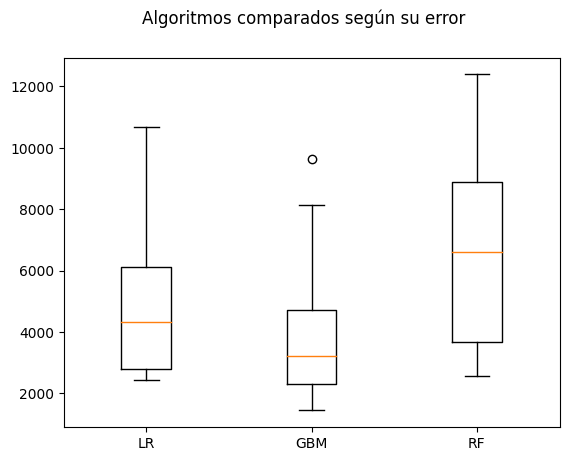

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Algoritmos comparados según su error')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

## Prediccion Final

In [79]:
prediccion = gbm.predict(Xt)
prediccion

array([22172.4432833 , 41688.01230212, 17298.8497271 , ...,
       30102.99926833, 41615.12743942, 16316.19161916])

In [80]:
TEST['PREDICCION PRODUCCION'] = prediccion
TEST = TEST.drop(['PRODUCCION','CAMPAÑA','ID_ZONA','ID_ESTACION',], axis=1)

,ID_FINCA,ALTITUD,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PREDICCION PRODUCCION
0,48626,600.0,32,2,0,1,4.0,22172.443283
1,47921,600.0,32,2,0,1,7.0,41688.012302
2,5696,650.0,59,1,0,1,8.0,17298.849727
3,98814,650.0,32,2,0,1,3.0,12212.110320
4,98814,650.0,40,2,0,1,3.0,12212.110320
...,...,...,...,...,...,...,...,...
1070,37461,700.0,52,2,0,1,4.0,24583.470540
1071,58769,700.0,32,2,0,1,4.0,31726.156351
1072,58769,700.0,59,2,0,1,4.0,30102.999268
1073,88928,700.0,40,2,0,1,5.0,41615.127439


In [81]:
TEST = TEST.drop(['ALTITUD'], axis=1)
TEST

,ID_FINCA,VARIEDAD,MODO,TIPO,COLOR,SUPERFICIE,PREDICCION PRODUCCION
0,48626,32,2,0,1,4.0,22172.443283
1,47921,32,2,0,1,7.0,41688.012302
2,5696,59,1,0,1,8.0,17298.849727
3,98814,32,2,0,1,3.0,12212.110320
4,98814,40,2,0,1,3.0,12212.110320
...,...,...,...,...,...,...,...
1070,37461,52,2,0,1,4.0,24583.470540
1071,58769,32,2,0,1,4.0,31726.156351
1072,58769,59,2,0,1,4.0,30102.999268
1073,88928,40,2,0,1,5.0,41615.127439


## Exportar el dataset de respuesta

In [101]:
TEST.to_csv('Sarobe.txt', sep='|', index=False, header = True, decimal='.')